In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import excel table
SFE_data=pd.read_excel('SFE_Dataset.xlsx')
col=SFE_data.columns
print(col)

#preprocessing

#remove columns with zero elements

nonzero_ratio=np.zeros(len(col))
counter=0
for col_i in col:
    n_zeros=0
    #print('column : ',col_i)
    #import pdb; pdb.set_trace()
    for j in range(0,len(SFE_data[col_i])):
        if(SFE_data[col_i][j]==0):
            n_zeros+=1
    nonzero_ratio[counter]=1-n_zeros/len(SFE_data[col_i])
    counter+=1
print('non zero ratio : ',nonzero_ratio)


drop_cols=[]
for i in range(0,len(SFE_data.columns)-1):
    if (nonzero_ratio[i]<.6):
        #print('non zero ratio',nonzero_ratio[i])
        drop_cols.append(col[i])

SFE_data_cleancols=SFE_data.drop(drop_cols,axis=1)
new_col=SFE_data_cleancols.columns
print(len(new_col),len(col))
#import pdb; pdb.set_trace()

Index(['C', 'N', 'P', 'S', 'V', 'Ni', 'Nb', 'Al', 'Ti', 'Fe', 'Hf', 'Mo', 'Mn',
       'Co', 'Si', 'Cr', 'Cu', 'SFE'],
      dtype='object')
non zero ratio :  [0.89006342 0.60887949 0.36997886 0.40169133 0.00422833 0.75052854
 0.01268499 0.09513742 0.01479915 1.         0.00211416 0.39957717
 0.80338266 0.00634249 0.60887949 0.8372093  0.05496829 1.        ]
8 18


In [130]:
#SFE into high and low, remove rows

#high and low SFE
SFE=SFE_data_cleancols['SFE']
non_SFE=[]
for i in range(0,len(SFE)):
    if(SFE[i]<=35):
        SFE_data_cleancols['SFE'][i]=0
    elif(SFE[i]>=45):
        SFE_data_cleancols['SFE'][i]=1
    elif(SFE[i]<45 and SFE[i]>35):
        non_SFE.append(i)
SFE_data_cleanrows=SFE_data_cleancols.drop(non_SFE)        
SFE=SFE_data_cleanrows['SFE']
#print(SFE)
#SFE_data_cleanrows.head
#SFE_data_cleancols.head
#import pdb; pdb.set_trace()

# for resetting the index after removing the columns or rows
SFE_data_cleanrows=SFE_data_cleanrows.reset_index(drop=True)

[m,n]=SFE_data_cleanrows.shape
col=SFE_data_cleanrows.columns

#clean rows that have any zeros
zer=[]
ncol=len(col)
for i in range(0,m):
    #import pdb; pdb.set_trace()
    n_zeros=0
    for j in range (0,ncol-1):
        if(SFE_data_cleanrows.at[i, col[j]]==0):
            n_zeros+=1
    if(n_zeros>0):        
        zer.append(i) 
        
        
#import pdb; pdb.set_trace()


In [131]:
SFE_data_cleanrows2=SFE_data_cleanrows.drop(zer)
# for resetting the index after removing the columns or rows
SFE_data_cleanrows2=SFE_data_cleanrows2.reset_index(drop=True)


In [132]:
# randomly sample into training data and then reject data with over 55% of any one
[m,n]=SFE_data_cleanrows2.shape
import random
import time
random.seed(time.time())
okay_sample_flag=0
while(okay_sample_flag==0):
    train_set=SFE_data_cleanrows2.sample(frac=0.2,random_state=random.randint(1,100))
    test_set=SFE_data_cleanrows2.drop(train_set.index)

    train_set=train_set.reset_index(drop=True)
    test_set=test_set.reset_index(drop=True)

    #remove samples for more than 55%
    n_ones=0
    for i in range(0,len(train_set)):
        if (train_set.at[i,'SFE']==1):
            n_ones+=1
    if(n_ones/len(train_set)>.45 and n_ones/len(train_set)<.55):
        okay_sample_flag+=1
#    import pdb; pdb.set_trace()


In [133]:
train_set.head()

,C,N,Ni,Fe,Mn,Si,Cr,SFE
0,0.019,0.0940,6.60,73.2370,1.61,0.480,17.60,0.0
1,0.070,0.5400,16.13,54.5700,9.64,0.450,18.48,1.0
2,0.002,0.0974,15.56,65.0561,0.01,0.030,16.95,1.0
3,0.002,0.0011,15.75,64.9895,0.02,0.003,16.95,1.0
4,0.003,0.0071,15.40,69.1557,0.03,0.020,13.09,1.0


In [134]:
from scipy import stats

col=train_set.columns

ttest=[]
for i in range (0,len(col)-1):
    ttest.append([stats.ttest_ind(train_set[train_set['SFE']==0][col[i]], train_set[train_set['SFE']==1][col[i]],equal_var=False),col[i]])


In [135]:
ttest_sorted=sorted(ttest,key=lambda x:x[:][0][1])
print(ttest_sorted[0][1])
col1=ttest_sorted[0][1]
col2=ttest_sorted[1][1]
col3=ttest_sorted[2][1]
col4=ttest_sorted[3][1]
col5=ttest_sorted[4][1]

Ni


In [136]:
for i in range (0,len(ttest_sorted)):
    print(ttest_sorted[i][0:3])

[Ttest_indResult(statistic=-4.3239107721456715, pvalue=0.0004492244407214775), 'Ni']
[Ttest_indResult(statistic=3.0647129964127613, pvalue=0.005900861532428405), 'Fe']
[Ttest_indResult(statistic=1.7983754067753106, pvalue=0.08525771622992465), 'Si']
[Ttest_indResult(statistic=-1.2665396069981996, pvalue=0.22313289432374772), 'Cr']
[Ttest_indResult(statistic=1.158782608176092, pvalue=0.2682608797840072), 'C']
[Ttest_indResult(statistic=0.8022070813159011, pvalue=0.43065130815498376), 'Mn']
[Ttest_indResult(statistic=-0.70260293686923, pvalue=0.490431149814897), 'N']


In [121]:
train_set_0=train_set[train_set['SFE']==0]
train_set_1=train_set[train_set['SFE']==1]

train_set_0=train_set_0.reset_index(drop=True)
train_set_1=train_set_1.reset_index(drop=True)

smean1=np.array([float(train_set_0.mean(0)[col1]),float(train_set_0.mean(0)[col2])])
smean2=np.array([float(train_set_1.mean(0)[col1]),float(train_set_1.mean(0)[col2])])
cov=train_set.cov()
#import pdb; pdb.set_trace()

scov=np.zeros((2,2))
scov=[[float(cov[col1][col1]),float(cov[col1][col2])],[float(cov[col2][col1]),float(cov[col2][col2])]]
scov_inv=np.linalg.inv(scov)
a_lda=scov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(scov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(0,30,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

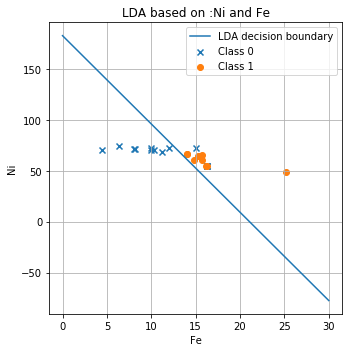

In [74]:
fig, ax = plt.subplots(figsize=[5,5])
plt.scatter(train_set_0[col1],train_set_0[col2],marker='x',label='Class 0')
plt.scatter(train_set_1[col1],train_set_1[col2],marker='o',label='Class 1')
plt.plot(x1_lda,y_lda,label='LDA decision boundary')
plt.title('LDA based on :'+ col1 +' and '+ col2)
plt.ylabel(col1)
plt.xlabel(col2)
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw2c.png')

In [122]:
#estimating error on test set
test_set_0=test_set[test_set['SFE']==0]
test_set_1=test_set[test_set['SFE']==1]

test_set_0=test_set_0.reset_index(drop=True)
test_set_1=test_set_1.reset_index(drop=True)

errtest_set_0=np.zeros((len(test_set_0),2))
errtest_set_1=np.zeros((len(test_set_1),2))
for i in range (0,len(test_set_0)):
    errtest_set_0[i][0]=test_set_0[col1][i]
    errtest_set_0[i][1]=test_set_0[col2][i]
for i in range (0,len(test_set_1)):
    errtest_set_1[i][0]=test_set_0[col1][i]
    errtest_set_1[i][1]=test_set_0[col2][i]
    #[test_set[test_set['SFE']==0][col1],test_set[test_set['SFE']==0][col2]]
    #test_set_1[i]=[test_set[test_set['SFE']==1][col1],test_set[test_set['SFE']==1][col2]]
#import pdb; pdb.set_trace()


err1=0
TP=0
FP=0
TN=0
FN=0
g1=0
g2=0
for i in range(0,len(errtest_set_0)):
    g1=a_lda.dot(errtest_set_0[i])+b_lda
    if (g1>0):
        err1+=1
        FN+=1
    if (g1<=0):
        TN+=1        
err2=0
for i in range(0,len(errtest_set_1)):
    g2=a_lda.dot(errtest_set_1[i])+b_lda
    if (g2<=0):
        err2+=1
        FP+=1
        
    if (g2>0):
        TP+=1
err=(err1+err2)/(len(errtest_set_0)+len(errtest_set_1))
conf_mat=np.array(([TP,FP],[FN,TN]))
print(err)

0.49504950495049505


In [105]:
err
print(conf_mat)

[[ 4 46]
 [ 4 47]]


In [107]:
pd.DataFrame(conf_mat,[' Predicted 1','Predicted 0'],['Actual 1','Actual 0'])

,Actual 1,Actual 0
Predicted 1,4,46
Predicted 0,4,47


In [119]:
#now repeat for the top 3,4 and 5 predictors
#first we do top 3 predictors

train_set_0=train_set[train_set['SFE']==0]
train_set_1=train_set[train_set['SFE']==1]

train_set_0=train_set_0.reset_index(drop=True)
train_set_1=train_set_1.reset_index(drop=True)

#clean train set to only contain columns of our interest
train_set_clean=train_set[[col1,col2,col3]]
train_set_0_clean=train_set_0[[col1,col2,col3]]
train_set_1_clean=train_set_1[[col1,col2,col3]]


smean1=np.array(train_set_0_clean.mean(0))
smean2=np.array(train_set_1_clean.mean(0))
cov=train_set_clean.cov()
#import pdb; pdb.set_trace()
cov_inv=np.linalg.inv(cov)
a_lda=cov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(cov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(0,40,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

In [120]:
#estimating error on test set
test_set_0=test_set[test_set['SFE']==0]
test_set_1=test_set[test_set['SFE']==1]

test_set_0=test_set_0.reset_index(drop=True)
test_set_1=test_set_1.reset_index(drop=True)

#consider only predictors of our importance
test_set_clean=test_set[[col1,col2,col3]]
test_set_0_clean=test_set_0[[col1,col2,col3]]
test_set_1_clean=test_set_1[[col1,col2,col3]]

errtest_set_0=np.array(test_set_0_clean)
errtest_set_1=np.array(test_set_1_clean)



#import pdb; pdb.set_trace()
err1=0
TP=0
FP=0
TN=0
FN=0
g1=0
g2=0
for i in range(0,len(errtest_set_0)):
    g1=a_lda.dot(errtest_set_0[i])+b_lda
    if (g1>0):
        err1+=1
        FN+=1
    if (g1<=0):
        TN+=1        
err2=0
for i in range(0,len(errtest_set_1)):
    g2=a_lda.dot(errtest_set_1[i])+b_lda
    if (g2<=0):
        err2+=1
        FP+=1
        
    if (g2>0):
        TP+=1
err=(err1+err2)/(len(errtest_set_0)+len(errtest_set_1))
print(err)
conf_mat=np.array(([TP,FP],[FN,TN]))


0.12871287128712872


In [110]:
pd.DataFrame(conf_mat,[' Predicted 1','Predicted 0'],['Actual 1','Actual 0'])

,Actual 1,Actual 0
Predicted 1,40,10
Predicted 0,3,48


In [117]:
#now we do for top 4 predictors

train_set_0=train_set[train_set['SFE']==0]
train_set_1=train_set[train_set['SFE']==1]

train_set_0=train_set_0.reset_index(drop=True)
train_set_1=train_set_1.reset_index(drop=True)

#clean train set to only contain columns of our interest
train_set_clean=train_set[[col1,col2,col3,col4]]
train_set_0_clean=train_set_0[[col1,col2,col3,col4]]
train_set_1_clean=train_set_1[[col1,col2,col3,col4]]


smean1=np.array(train_set_0_clean.mean(0))
smean2=np.array(train_set_1_clean.mean(0))
cov=train_set_clean.cov()
#import pdb; pdb.set_trace()
cov_inv=np.linalg.inv(cov)
a_lda=cov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(cov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(0,40,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

In [118]:
#estimating error on test set
test_set_0=test_set[test_set['SFE']==0]
test_set_1=test_set[test_set['SFE']==1]

test_set_0=test_set_0.reset_index(drop=True)
test_set_1=test_set_1.reset_index(drop=True)

#consider only predictors of our importance
test_set_clean=test_set[[col1,col2,col3,col4]]
test_set_0_clean=test_set_0[[col1,col2,col3,col4]]
test_set_1_clean=test_set_1[[col1,col2,col3,col4]]

errtest_set_0=np.array(test_set_0_clean)
errtest_set_1=np.array(test_set_1_clean)



#import pdb; pdb.set_trace()
err1=0
TP=0
FP=0
TN=0
FN=0
g1=0
g2=0
for i in range(0,len(errtest_set_0)):
    g1=a_lda.dot(errtest_set_0[i])+b_lda
    if (g1>0):
        err1+=1
        FN+=1
    if (g1<=0):
        TN+=1        
err2=0
for i in range(0,len(errtest_set_1)):
    g2=a_lda.dot(errtest_set_1[i])+b_lda
    if (g2<=0):
        err2+=1
        FP+=1
        
    if (g2>0):
        TP+=1
err=(err1+err2)/(len(errtest_set_0)+len(errtest_set_1))
conf_mat=np.array(([TP,FP],[FN,TN]))
print(err)

0.0891089108910891


In [113]:
pd.DataFrame(conf_mat,[' Predicted 1','Predicted 0'],['Actual 1','Actual 0'])

,Actual 1,Actual 0
Predicted 1,44,6
Predicted 0,3,48


In [114]:
#now we do for top 5 predictors

train_set_0=train_set[train_set['SFE']==0]
train_set_1=train_set[train_set['SFE']==1]

train_set_0=train_set_0.reset_index(drop=True)
train_set_1=train_set_1.reset_index(drop=True)

#clean train set to only contain columns of our interest
train_set_clean=train_set[[col1,col2,col3,col4,col5]]
train_set_0_clean=train_set_0[[col1,col2,col3,col4,col5]]
train_set_1_clean=train_set_1[[col1,col2,col3,col4,col5]]


smean1=np.array(train_set_0_clean.mean(0))
smean2=np.array(train_set_1_clean.mean(0))
cov=train_set_clean.cov()
#import pdb; pdb.set_trace()
cov_inv=np.linalg.inv(cov)
a_lda=cov_inv.dot((smean2-smean1))
b_lda=-0.5*((smean2-smean1).dot(cov_inv)).dot((smean1+smean2))
x1_lda=np.linspace(0,40,num=20)
y_lda=-a_lda[0]/a_lda[1]*x1_lda-b_lda/a_lda[1]

In [115]:
#estimating error on test set
test_set_0=test_set[test_set['SFE']==0]
test_set_1=test_set[test_set['SFE']==1]

test_set_0=test_set_0.reset_index(drop=True)
test_set_1=test_set_1.reset_index(drop=True)

#consider only predictors of our importance
test_set_clean=test_set[[col1,col2,col3,col4,col5]]
test_set_0_clean=test_set_0[[col1,col2,col3,col4,col5]]
test_set_1_clean=test_set_1[[col1,col2,col3,col4,col5]]

errtest_set_0=np.array(test_set_0_clean)
errtest_set_1=np.array(test_set_1_clean)



#import pdb; pdb.set_trace()
err1=0
TP=0
FP=0
TN=0
FN=0
g1=0
g2=0
for i in range(0,len(errtest_set_0)):
    g1=a_lda.dot(errtest_set_0[i])+b_lda
    if (g1>0):
        err1+=1
        FN+=1
    if (g1<=0):
        TN+=1        
err2=0
for i in range(0,len(errtest_set_1)):
    g2=a_lda.dot(errtest_set_1[i])+b_lda
    if (g2<=0):
        err2+=1
        FP+=1
        
    if (g2>0):
        TP+=1
err=(err1+err2)/(len(errtest_set_0)+len(errtest_set_1))
conf_mat=np.array(([TP,FP],[FN,TN]))
print(err)

0.07920792079207921


In [116]:
pd.DataFrame(conf_mat,[' Predicted 1','Predicted 0'],['Actual 1','Actual 0'])

,Actual 1,Actual 0
Predicted 1,45,5
Predicted 0,3,48
